In [9]:
import numpy as np, pandas as pd, scanpy as sc, anndata as ad, matplotlib.pyplot as plt, os, seaborn as sns
import matplotlib.colors as mcolors
import pandas as pd
from tqdm import tqdm
import plotly.express as px
wd = '/ocean/projects/cis240075p/skeshari/igvf/bcell2/male_donor/'
out_path = os.path.join(wd, 'out_data', 'dynamic_grn')
os.makedirs(f"{out_path}/figures", exist_ok=True)
os.makedirs(f"{out_path}/out_files", exist_ok=True)
sc.settings.figdir = f"{out_path}/figures"

In [12]:
net_scores = pd.read_csv('/ocean/projects/cis240075p/skeshari/igvf/bcell1/male_donor/out_data/grn_inference/out_files/ridge_fitted_2_merged_network_scores.csv')

In [17]:
cluster = 3
net_scores[net_scores['cluster'] == cluster].sort_values('degree_all', ascending=False).head(10)

,Unnamed: 0,degree_all,degree_centrality_all,degree_in,degree_centrality_in,degree_out,degree_centrality_out,betweenness_centrality,eigenvector_centrality,cluster
7194,PTEN,436,0.291639,24,0.016054,412,0.275585,12403.0,1.000000,3
7016,ARID5B,393,0.262876,13,0.008696,380,0.254181,13542.0,0.598569,3
7487,CREB3L2,380,0.254181,7,0.004682,373,0.249498,24270.0,0.417084,3
7680,HIVEP2,333,0.222742,3,0.002007,330,0.220736,3311.0,0.455260,3
7027,HIVEP3,324,0.216722,17,0.011371,307,0.205351,58776.0,0.451586,3
8439,KLF2,322,0.215385,0,0.000000,322,0.215385,0.0,0.226349,3
7748,POLR2A,320,0.214047,8,0.005351,312,0.208696,13477.0,0.305262,3
7844,TFEC,293,0.195987,8,0.005351,285,0.190635,12948.0,0.458301,3
7268,IRF8,286,0.191304,8,0.005351,278,0.185953,18802.0,0.201285,3
7200,PHF21A,283,0.189298,7,0.004682,276,0.184615,21342.0,0.387047,3


In [19]:
df

,TF,loc,score,chr,start,end
0,AHR,chr10:102714357:102714376,4.701148,chr10,102714357,102714376
1,AHR,chr10:102918116:102918133,5.337871,chr10,102918116,102918133
2,AHR,chr10:112183884:112183907,4.782264,chr10,112183884,112183907
3,AHR,chr10:117375494:117375515,4.616190,chr10,117375494,117375515
4,AHR,chr10:120949047:120949068,4.792481,chr10,120949047,120949068
...,...,...,...,...,...,...
179839,ZSCAN30,chrX:155216431:155216452,4.823630,chrX,155216431,155216452
179840,ZSCAN30,chrX:155382007:155382032,5.618630,chrX,155382007,155382032
179841,ZSCAN30,chrX:2691299:2691322,5.103743,chrX,2691299,2691322
179842,ZSCAN30,chrX:48508934:48508957,5.092834,chrX,48508934,48508957


In [21]:
tf_list_pb = ['POLR2A', 'CREB3L2', 'KLF2']
tf_list_gc = ['PTEN', 'ARID5B', 'HIVEP2']
#pb window = 145
#gc window = 192
df = pd.read_csv(f'/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/dictys_outs/actb1_added_v2/tmp_dynamic/Subset192/binding.tsv.gz', sep='\t', compression='gzip')
df[['chr', 'start', 'end']] = df['loc'].str.split(':', expand=True) 
for tf in tf_list_gc:
    tf_df = df[df['TF'] == tf].copy()
    tf_df = tf_df[['chr', 'start', 'end']]
    tf_df.to_csv(f'{out_path}/out_files/{tf}_binding_sites.tsv', sep='\t', index=False)

In [6]:
df

,TF,loc,score,chr,start,end
0,AHR,chr10:100346483:100346502,4.281573,chr10,100346483,100346502
1,AHR,chr10:102394886:102394911,4.405027,chr10,102394886,102394911
2,AHR,chr10:102421100:102421125,6.072367,chr10,102421100,102421125
3,AHR,chr10:102918111:102918130,5.315153,chr10,102918111,102918130
4,AHR,chr10:103584907:103584932,4.508371,chr10,103584907,103584932
...,...,...,...,...,...,...
143814,ZNF98,chr9:68639451:68639476,4.707839,chr9,68639451,68639476
143815,ZNF98,chr9:81655571:81655596,5.044368,chr9,81655571,81655596
143816,ZNF98,chrX:101386248:101386273,4.636550,chrX,101386248,101386273
143817,ZNF98,chrX:46792672:46792697,4.374344,chrX,46792672,46792697


In [7]:
tf_df = df[df['TF'] == tf]
tf_df

,TF,loc,score,chr,start,end
68060,NFATC2,chr10:100148865:100148888,4.449873,chr10,100148865,100148888
68061,NFATC2,chr10:102132550:102132571,4.727249,chr10,102132550,102132571
68062,NFATC2,chr10:102918111:102918130,5.297260,chr10,102918111,102918130
68063,NFATC2,chr10:110273710:110273725,4.732475,chr10,110273710,110273725
68064,NFATC2,chr10:11176132:11176153,4.296592,chr10,11176132,11176153
...,...,...,...,...,...,...
68804,NFATC2,chrX:74614752:74614775,4.382000,chrX,74614752,74614775
68805,NFATC2,chrX:77786250:77786271,4.334682,chrX,77786250,77786271
68806,NFATC2,chrX:77786300:77786321,4.558701,chrX,77786300,77786321
68807,NFATC2,chrY:12905680:12905703,5.209795,chrY,12905680,12905703


In [3]:
tf_df = df[df['TF'] == tf]
tf_df = tf_df.groupby('chr').agg({'score': 'mean'}).mean().values[0]
tf_df

4.7186595726410925

In [ ]:
# get unique locations from the dataframe
unique_locs_per_tf = df.groupby('TF')['loc'].apply(lambda x: set(x)).apply(len)
unique_loc_counts_per_tf = unique_locs_per_tf.apply(len)
print("Per-TF unique loc counts (top 20):")
print(unique_loc_counts_per_tf.sort_values(ascending=False).head(20))

In [2]:
import pandas as pd
from tqdm import tqdm

# List of TFs of interest
tfs = ['NFATC2', 'HIVEP1', 'TFEC', 'PRDM1', 'PAX5', 
       'BACH1', 'BATF3', 'RBPJ', 'KLF7', 'ARID3A', 'IKZF2', 'SP1']

# Initialize dictionaries to hold scores and counts for each TF
score = {tf: [] for tf in tfs}
count = {tf: [] for tf in tfs}

for i in tqdm(range(1, 195)):
    df = pd.read_csv(f'/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/dictys_outs/actb1_added_v2/tmp_dynamic/Subset{i}/binding.tsv.gz', 
                     sep='\t', compression='gzip')
    df[['chr', 'start', 'end']] = df['loc'].str.split(':', expand=True)

    for tf in tfs:
        tf_df = df[df['TF'] == tf]
        if not tf_df.empty:
            median_score = tf_df.groupby('chr').agg({'score': 'mean'}).mean().values[0]
            score[tf].append(median_score)

            count_score = tf_df.groupby('chr').agg({'score': 'count'}).mean().values[0]
            count[tf].append(count_score)
        else:
            # Handle cases when TF is absent in this file
            score[tf].append(float('nan'))
            count[tf].append(0)

# Example access: score['IKZF2'], count['NFATC2'], etc.


  0%|          | 0/194 [00:00<?, ?it/s]

100%|██████████| 194/194 [02:01<00:00,  1.60it/s]


In [3]:
PB_fate_window_indices = [1] + list(range(97, 3, -1)) + [0] + list(range(98, 147, 1)) + [2]
GC_fate_window_indices = [1] + list(range(97, 3, -1)) + [0] + list(range(147, 193, 1)) + [3]

In [6]:
! plotly_get_chrome


Traceback (most recent call last):
  File "/jet/home/skeshari/.local/bin/plotly_get_chrome", line 8, in <module>
    sys.exit(get_chrome())
  File "/jet/home/skeshari/.local/lib/python3.8/site-packages/plotly/io/_kaleido.py", line 797, in get_chrome
    raise ValueError(
ValueError: 
This command requires Kaleido v1.0.0 or greater.
Install it using `pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`."



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Specify TFs of interest
tfs = ['NFATC2', 'HIVEP1', 'TFEC', 'PRDM1', 'PAX5',
       'BACH1', 'BATF3', 'RBPJ', 'IKZF2', 'SP1',]
    #    'KLF7', 'ARID3A']
# Helper functions
def _to_float(v):
    if hasattr(v, "values"):
        arr = v.values
        if len(arr) == 0:
            return np.nan
        return arr[0]
    return float(v)

def order_series(series, idx_order):
    return np.array([series[i] if i < len(series) else np.nan for i in idx_order], dtype=float)

def smooth(series, sigma=2):
    return gaussian_filter1d(series, sigma=sigma)

# Your indices (unchanged)
PB_fate_window_indices = [1] + list(range(97, 3, -1)) + [0] + list(range(98, 147, 1)) + [2]
GC_fate_window_indices = [1] + list(range(97, 3, -1)) + [0] + list(range(147, 193, 1)) + [3]
x_pb = np.arange(1, len(PB_fate_window_indices) + 1)
x_gc = np.arange(1, len(GC_fate_window_indices) + 1)

# General processing function—count is a dict: count[tf]=[series_or_scalar, ...] for each TF
def process_tf_data(count, tfs, idx_pb, idx_gc, order=True, smooth_sigma=1):
    series_pb, series_gc = {}, {}
    for tf in tfs:
        vals = [(_to_float(v)) for v in count.get(tf, [])]
        series_pb[tf] = smooth(order_series(vals, idx_pb), sigma=smooth_sigma) if order else np.array(vals)
        series_gc[tf] = smooth(order_series(vals, idx_gc), sigma=smooth_sigma) if order else np.array(vals)
    return series_pb, series_gc

series_pb, series_gc = process_tf_data(
    count, tfs, PB_fate_window_indices, GC_fate_window_indices, order=True, smooth_sigma=2
)

In [17]:
import plotly.graph_objects as go
fig = go.Figure()
tf_colors = {
    'NFATC2': 'orange',
    'HIVEP1': 'cyan',
    'TFEC': 'green',
    'PRDM1': 'olive',
    'PAX5': 'red',
    'BACH1': 'purple',
    'BATF3': 'brown',
    'RBPJ': 'pink',
    # 'KLF7': 'gray',   # if needed
    # 'ARID3A': 'blue', # if needed
    'IKZF2': 'green',
    'SP1': 'orange',
}
for tf in tfs:
    tf_color = tf_colors.get(tf, "black")
    
    # GC (dashed, default bottom axis)
    y_gc = series_gc[tf]
    text_gc = [f"{tf} GC<br>i={i}<br>window={w}" for i, w in zip(x_gc, GC_fate_window_indices)]
    fig.add_trace(go.Scatter(
        x=x_gc,
        y=y_gc,
        mode='lines',
        name=f"{tf} GC",
        line=dict(dash='dash', color=tf_color),
        opacity=0.8,
        hoverinfo='text',
        text=text_gc
    ))

    # PB (solid, top axis)
    y_pb = series_pb[tf]
    text_pb = [f"{tf} PB<br>i={i}<br>window={w}" for i, w in zip(x_pb, PB_fate_window_indices)]
    fig.add_trace(go.Scatter(
        x=x_pb,
        y=y_pb,
        mode='lines',
        name=f"{tf} PB",
        line=dict(dash='solid', color=tf_color),
        opacity=0.8,
        hoverinfo='text',
        text=text_pb,
        xaxis='x2'  # attach to top axis
    ))

fig.update_layout(
    title='Mean TF score per subset (PB: solid, GC: dashed)',
    xaxis=dict(
        title='GC window index (i)',
        tickmode='array',
        tickvals=list(x_gc),
        ticktext=[str(w) for w in GC_fate_window_indices],
        tickangle=90,
        showline=False,
        showgrid=False,
        linecolor='black',
        ticks='outside',
        showticklabels=True
    ),
    xaxis2=dict(
        title='PB window index (i)',
        tickmode='array',
        tickvals=list(x_pb),
        ticktext=[str(w) for w in PB_fate_window_indices],
        tickangle=90,
        anchor='y',
        overlaying='x',
        side='top',
        matches='x',
        showline=False,
        showgrid=False,
        linecolor='black',
        ticks='outside',
        showticklabels=True
    ),
    yaxis=dict(title='score (original log space)'),
    legend=dict(orientation='v', x=1.02, y=0.5),
    margin=dict(t=80, r=220),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig.show()
fig.write_image("/ocean/projects/cis240075p/skeshari/igvf/bcell2/male_donor/out_data/out_other_methods/tf_count_dynamic_grn_plotly.svg", format='svg', width=2000, height=600)


/tmp/ipykernel_2003/37416547.py:87: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




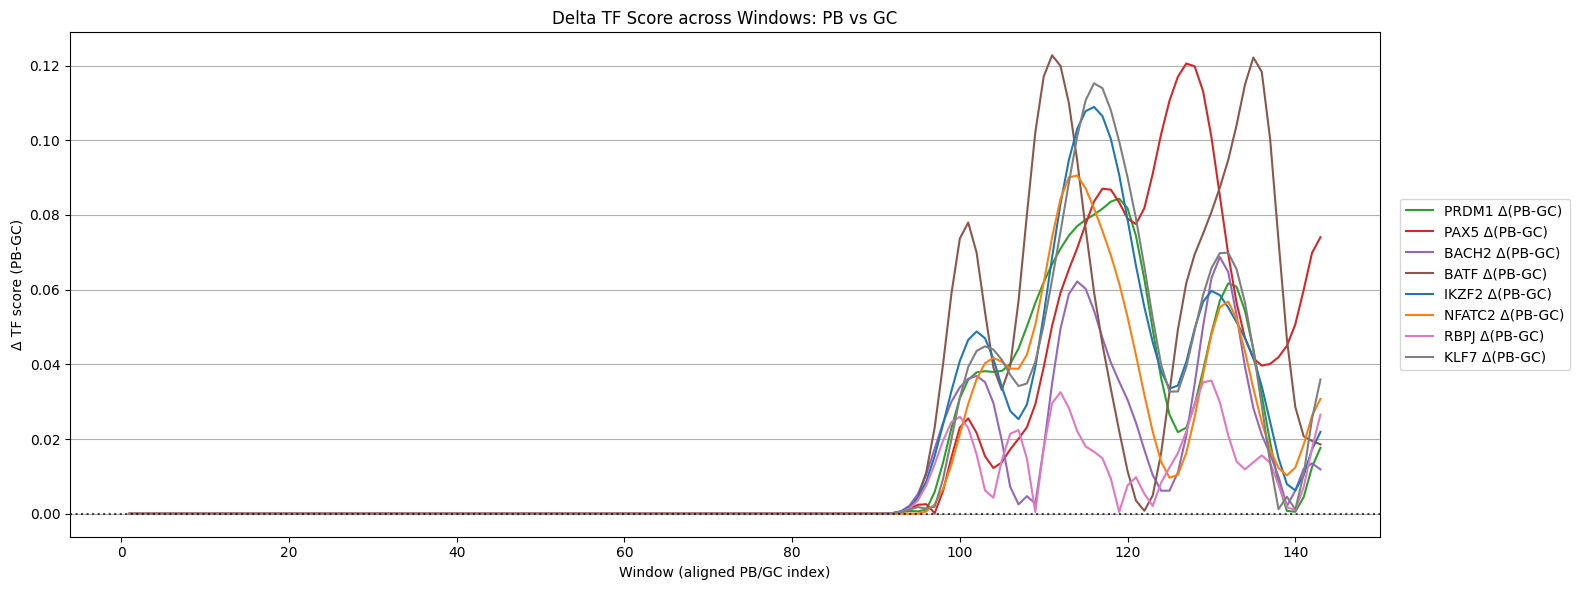

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Helper function to convert pandas Series or scalars to float
def _to_float(v):
    return v.values[0] if hasattr(v, "values") else float(v)

# Convert all input scores to lists of floats
ik = [ _to_float(s) for s in score_ikzf2 ]
nf = [ _to_float(s) for s in score_nfatc2 ]
pr = [ _to_float(s) for s in score_prdm1 ]
pa = [ _to_float(s) for s in score_pax5 ]
ba = [ _to_float(s) for s in score_bach2 ]
bat = [ _to_float(s) for s in score_batf ]
rb = [ _to_float(s) for s in score_rbpj ]
kl = [ _to_float(s) for s in score_klf7 ]

PB_fate_window_indices = [1] + list(range(97, 3, -1)) + [0] + list(range(98, 147, 1)) + [2]
GC_fate_window_indices = [1] + list(range(97, 3, -1)) + [0] + list(range(147, 193, 1)) + [3]

def order_series(series, idx_order):
    return np.array([series[i] for i in idx_order], dtype=float)

def smooth(series, sigma=2):
    return gaussian_filter1d(series, sigma=sigma)

# PB and GC ordered and smoothed
ik_pb = smooth(order_series(ik, PB_fate_window_indices))
nf_pb = smooth(order_series(nf, PB_fate_window_indices))
pr_pb = smooth(order_series(pr, PB_fate_window_indices))
pa_pb = smooth(order_series(pa, PB_fate_window_indices))
ba_pb = smooth(order_series(ba, PB_fate_window_indices))
bat_pb = smooth(order_series(bat, PB_fate_window_indices))
rb_pb = smooth(order_series(rb, PB_fate_window_indices))
kl_pb = smooth(order_series(kl, PB_fate_window_indices))

ik_gc = smooth(order_series(ik, GC_fate_window_indices))
nf_gc = smooth(order_series(nf, GC_fate_window_indices))
pr_gc = smooth(order_series(pr, GC_fate_window_indices))
pa_gc = smooth(order_series(pa, GC_fate_window_indices))
ba_gc = smooth(order_series(ba, GC_fate_window_indices))
bat_gc = smooth(order_series(bat, GC_fate_window_indices))
rb_gc = smooth(order_series(rb, GC_fate_window_indices))
kl_gc = smooth(order_series(kl, GC_fate_window_indices))

# Ensure window alignment
window_len = min(len(ik_pb), len(ik_gc))
ik_delta = abs(ik_pb[:window_len] - ik_gc[:window_len])
nf_delta = abs(nf_pb[:window_len] - nf_gc[:window_len])
pr_delta = abs(pr_pb[:window_len] - pr_gc[:window_len])
pa_delta = abs(pa_pb[:window_len] - pa_gc[:window_len])
ba_delta = abs(ba_pb[:window_len] - ba_gc[:window_len])
bat_delta = abs(bat_pb[:window_len] - bat_gc[:window_len])
rb_delta = abs(rb_pb[:window_len] - rb_gc[:window_len])
kl_delta = abs(kl_pb[:window_len] - kl_gc[:window_len])

x_windows = np.arange(1, window_len + 1)
tf_colors = {
    'IKZF2': 'tab:blue',
    'NFATC2': 'tab:orange',
    'PRDM1': 'tab:green',
    'PAX5': 'tab:red',
    'BACH2': 'tab:purple',
    'BATF': 'tab:brown',
    'RBPJ': 'tab:pink',
    'KLF7': 'tab:gray'
}

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(x_windows, pr_delta, color=tf_colors['PRDM1'], label='PRDM1 Δ(PB-GC)')
ax.plot(x_windows, pa_delta, color=tf_colors['PAX5'], label='PAX5 Δ(PB-GC)')
ax.plot(x_windows, ba_delta, color=tf_colors['BACH2'], label='BACH2 Δ(PB-GC)')
ax.plot(x_windows, bat_delta, color=tf_colors['BATF'], label='BATF Δ(PB-GC)')
ax.plot(x_windows, ik_delta, color=tf_colors['IKZF2'], label='IKZF2 Δ(PB-GC)')
ax.plot(x_windows, nf_delta, color=tf_colors['NFATC2'], label='NFATC2 Δ(PB-GC)')
ax.plot(x_windows, rb_delta, color=tf_colors['RBPJ'], label='RBPJ Δ(PB-GC)')
ax.plot(x_windows, kl_delta, color=tf_colors['KLF7'], label='KLF7 Δ(PB-GC)')

ax.axhline(0, color='black', linestyle=':', alpha=0.7)
ax.set_xlabel('Window (aligned PB/GC index)')
ax.set_ylabel('Δ TF score (PB-GC)')
ax.set_title('Delta TF Score across Windows: PB vs GC')
ax.grid(True, axis='y')
plt.tight_layout()

# Vertical legend on right
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1, fontsize=10)

plt.show()


In [58]:
print('IKZF', ik_delta.mean())
print('NFATC2', nf_delta.mean())
print('RBPJ', rb_delta.mean())
print('PRDM1', pr_delta.mean())
print('PAX5', pa_delta.mean())
print('BACH2', ba_delta.mean())
print('BATF', bat_delta.mean())
print('KLF7', kl_delta.mean())

IKZF 0.016332716551559948
NFATC2 0.013177059226441662
RBPJ 0.0054209119296915916
PRDM1 0.014548428402226372
PAX5 0.01935820843816797
BACH2 0.009665610888555875
BATF 0.020437301907526545
KLF7 0.016688276345247673


In [ ]:

PB_post_bifurcation_window_indices = [0] + list(range(98, 147, 1)) + [2]
GC_post_bifurcation_window_indices = [0] + list(range(147, 193, 1)) + [3]

In [14]:
df3 = pd.read_csv('/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/dictys_outs/actb1_added_v2/tmp_dynamic/Subset1/linking.tsv.gz', sep='\t', compression='gzip')